In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import warnings
warnings.simplefilter(action='ignore')

In [25]:
df = pd.read_csv("/Users/lidouhao/Documents/GitHub/Captone_depression/00_data/02_intermediate/tweet2010_analysis.csv")

In [26]:
df['depression_tot'] = df['depression_rate'] * df['CENSUS2010POP']

In [27]:
log_df = df.copy()
columns_to_log = [
    'v002_rawvalue', 'v037_rawvalue', 'v009_rawvalue', 'v011_rawvalue', 'v012_rawvalue', 
    'v045_rawvalue', 'v004_rawvalue', 'v007_rawvalue', 'v021_rawvalue', 'v022_rawvalue',
    'v023_rawvalue', 'v028_rawvalue', 'v043_rawvalue', 'v041_rawvalue', 'v003_rawvalue',
    'CENSUS2010POP', 'depression_tot'
]

# Ensure all values are greater than 0 before applying log (to avoid -inf)
log_df[columns_to_log] = log_df[columns_to_log].replace(0, np.nan)
log_df[columns_to_log] = log_df[columns_to_log].apply(lambda x: np.log(x))

# Display the transformed DataFrame
log_df.head()

,cbsatitle,cbsacode,metropolitanmicropolitanstatis,depression,user_id,depression_rate,v002_rawvalue,v037_rawvalue,v009_rawvalue,v011_rawvalue,...,v007_rawvalue,v021_rawvalue,v022_rawvalue,v023_rawvalue,v028_rawvalue,v043_rawvalue,v041_rawvalue,v003_rawvalue,CENSUS2010POP,depression_tot
0,"Akron, OH",10420.0,Metropolitan Statistical Area,8,39,0.205128,11.376740,10.972341,12.061125,12.185149,...,13.261308,13.263676,12.178647,10.674013,11.067111,NaN,13.255656,11.307114,13.463397,11.879277
1,"Albany, GA",10500.0,Metropolitan Statistical Area,4,15,0.266667,10.423094,9.802223,10.394475,10.762292,...,11.683115,11.283822,10.253427,9.196817,10.020255,NaN,12.132344,9.960348,11.943779,10.622023
2,"Albany-Schenectady-Troy, NY",10580.0,Metropolitan Statistical Area,1,24,0.041667,11.616539,11.066692,12.149886,12.312343,...,13.506295,13.389075,12.525197,10.686547,11.293594,19.589662,14.068250,11.662948,13.677071,10.499017
3,"Atlanta-Sandy Springs-Roswell, GA",12060.0,Metropolitan Statistical Area,48,486,0.098765,13.465339,13.028545,13.778174,14.146737,...,15.272878,15.060618,14.372832,12.695531,13.226322,NaN,15.194400,13.816232,15.482911,13.167903
4,"Atlantic City-Hammonton, NJ",12100.0,Metropolitan Statistical Area,1,10,0.100000,11.088484,10.301656,11.359968,11.484207,...,12.500589,12.707654,11.394043,10.203578,10.630446,19.025769,13.615225,10.966571,12.826149,10.523564


In [77]:
df['CENSUS2010POP'].max() #600,000

np.int64(18839740)

In [78]:
df2 = df.loc[df['CENSUS2010POP']>= 600000]

In [82]:
df2.shape

(66, 23)

In [80]:
log_df_60 = df2.copy()
columns_to_log = [
    'v002_rawvalue', 'v037_rawvalue', 'v009_rawvalue', 'v011_rawvalue', 'v012_rawvalue', 
    'v045_rawvalue', 'v004_rawvalue', 'v007_rawvalue', 'v021_rawvalue', 'v022_rawvalue',
    'v023_rawvalue', 'v028_rawvalue', 'v043_rawvalue', 'v041_rawvalue', 'v003_rawvalue',
    'CENSUS2010POP', 'depression_tot'
]

# Ensure all values are greater than 0 before applying log (to avoid -inf)
log_df_60[columns_to_log] = log_df_60[columns_to_log].replace(0, np.nan)
log_df_60[columns_to_log] = log_df_60[columns_to_log].apply(lambda x: np.log(x))


In [179]:
df3 = pd.read_csv('20241025agg_smart_chr.csv')

In [173]:
df3 = df3.loc[df3['population']>= 600000]

In [93]:
df4 = pd.read_csv('twitter19_cbsa_depression_rates.csv')

In [117]:
df4_60 = df4.loc[df4['population']>= 600000]

----
# depression

In [180]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import scipy.stats as stats


def regression_with_ci(X, y):
    X = sm.add_constant(X)  # Add intercept
    model = sm.OLS(y, X).fit()
    beta = model.params[1]
    r_squared = model.rsquared
    n = len(y)
    
    # Get 95% confidence interval
    conf = model.conf_int(alpha=0.05)
    lower_ci, upper_ci = conf.loc['log_population']
    
    return beta, (lower_ci, upper_ci), r_squared, n

# Data as in previous setup
df3['log_population'] = np.log(df3['population'])
df3['log_dataval_population'] = np.log(df3['Data_value'] * df3['population']/100)

# Dictionary to store results
table_results = {
    'Dataset': [],
    'β': [],
    '95% CI': [],
    'R^2': [],
    'n': []
}

# Perform regression for each year
for year in df3['year'].unique():
    subset = df3[df3['year'] == year]
    if len(subset) > 1:
        X = subset['log_population']
        y = subset['log_dataval_population']
        
        beta, ci, r_squared, n = regression_with_ci(X, y)
        
        # Store the results in the dictionary
        table_results['Dataset'].append(f'BRFSS{int(year)}')
        table_results['β'].append(beta)
        table_results['95% CI'].append(ci)
        table_results['R^2'].append(r_squared)
        table_results['n'].append(n)

# Convert the results to a DataFrame
results_df = pd.DataFrame(table_results)

In [181]:
df4['log_population'] = np.log(df4['population'])
df4['log_dataval_population'] = np.log(df4['depression rate'] * df4['population'])
lm1 = smf.ols(formula='log_dataval_population~log_population', data = df4).fit()

In [182]:
lm2 = smf.ols(formula='depression_tot~CENSUS2010POP', data = log_df).fit()

In [183]:
# Create DataFrames for Twitter19 and Twitter10 results
twitter19_df = pd.DataFrame({
    'Dataset': ['Twitter19'],
    'β': [lm1.params['log_population']],
    '95% CI': [(lm1.conf_int().loc['log_population'][0], lm1.conf_int().loc['log_population'][1])],
    'R^2': [lm1.rsquared],
    'n': [lm1.nobs]
})

twitter10_df = pd.DataFrame({
    'Dataset': ['Twitter10'],
    'β': [lm2.params['CENSUS2010POP']],
    '95% CI': [(lm2.conf_int().loc['CENSUS2010POP'][0], lm2.conf_int().loc['CENSUS2010POP'][1])],
    'R^2': [lm2.rsquared],
    'n': [lm2.nobs]
})

# Concatenate the new rows with the original results_df
results_df = pd.concat([results_df, twitter19_df, twitter10_df], ignore_index=True)

In [184]:
results_df

,Dataset,β,95% CI,R^2,n
0,BRFSS2011,0.965975,"(0.9464614223163097, 0.9854880998539495)",0.981792,179.0
1,BRFSS2014,0.950451,"(0.9289815920349116, 0.9719200923301992)",0.984621,122.0
2,BRFSS2015,0.952605,"(0.9308948509344691, 0.9743160599792132)",0.984218,123.0
3,BRFSS2017,0.950832,"(0.9309521289612415, 0.9707125180160945)",0.986020,129.0
4,BRFSS2018,0.953896,"(0.9302257721283076, 0.9775653148381926)",0.980729,127.0
5,BRFSS2019,0.963092,"(0.939119881895385, 0.9870645924441532)",0.980301,129.0
6,BRFSS2020,0.947301,"(0.9252822246391625, 0.9693197775948117)",0.985093,112.0
7,BRFSS2021,0.955879,"(0.9342288734054027, 0.9775295443943002)",0.984927,119.0
8,BRFSS2022,0.946470,"(0.9243146727872749, 0.9686249491570158)",0.983366,123.0
9,BRFSS2012,0.942895,"(0.9226297659576888, 0.9631607413671073)",0.980245,172.0


In [170]:
df4_60['log_population'] = np.log(df4_60['population'])
df4_60['log_dataval_population'] = np.log(df4_60['depression rate'] * df4_60['population'])
lm1_60 = smf.ols(formula='log_dataval_population~log_population', data = df4_60).fit()
lm2_60 = smf.ols(formula='depression_tot~CENSUS2010POP', data = log_df_60).fit()

In [177]:
# Create DataFrames for Twitter19 and Twitter10 results
twitter19_df_60 = pd.DataFrame({
    'Dataset': ['Twitter19'],
    'β': [lm1_60.params['log_population']],
    '95% CI': [(lm1_60.conf_int().loc['log_population'][0], lm1_60.conf_int().loc['log_population'][1])],
    'R^2': [lm1_60.rsquared],
    'n': [lm1_60.nobs]
})

twitter10_df_60 = pd.DataFrame({
    'Dataset': ['Twitter10'],
    'β': [lm2_60.params['CENSUS2010POP']],
    '95% CI': [(lm2_60.conf_int().loc['CENSUS2010POP'][0], lm2_60.conf_int().loc['CENSUS2010POP'][1])],
    'R^2': [lm2_60.rsquared],
    'n': [lm2_60.nobs]
})

# Concatenate the new rows with the original results_df
results_df_60 = pd.concat([results_df, twitter19_df_60, twitter10_df_60], ignore_index=True)

In [178]:
results_df_60

,Dataset,β,95% CI,R^2,n
0,BRFSS2011,0.921349,"(0.8794962615012816, 0.9632010277663214)",0.964461,73.0
1,BRFSS2012,0.890374,"(0.8493219111334435, 0.9314261912517677)",0.958826,82.0
2,BRFSS2013,0.902895,"(0.8624862637382308, 0.9433041418190352)",0.963042,78.0
3,BRFSS2015,0.894689,"(0.8580672912968079, 0.9313106341894812)",0.969717,76.0
4,BRFSS2018,0.886275,"(0.8498241772451459, 0.9227266147622925)",0.968608,78.0
5,BRFSS2019,0.892655,"(0.8601020274852405, 0.9252072060832697)",0.974496,80.0
6,BRFSS2020,0.873605,"(0.8468586219791827, 0.9003504959077147)",0.983065,75.0
7,BRFSS2021,0.891201,"(0.8636816517643475, 0.9187213438787429)",0.982777,75.0
8,BRFSS2022,0.885495,"(0.8531899272915862, 0.9177992790985017)",0.974805,79.0
9,BRFSS2016,0.892519,"(0.849693495141877, 0.9353437295201751)",0.957753,78.0


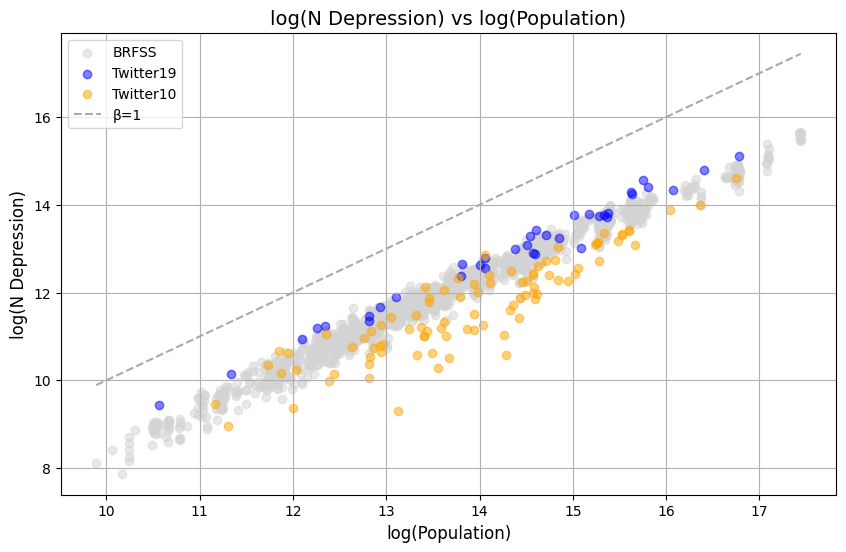

In [159]:
plt.figure(figsize=(10, 6))

plt.scatter(df3['log_population'], df3['log_dataval_population'], label='BRFSS', color="lightgray",alpha = 0.5)
plt.scatter(df4['log_population'], df4['log_dataval_population'], label='Twitter19', color="blue",alpha = 0.5)
plt.scatter(log_df['CENSUS2010POP'], log_df['depression_tot'], label='Twitter10', color="orange",alpha = 0.5)

# Plot the dashed line for y = x
x_vals = np.linspace(df3['log_population'].min(), df3['log_population'].max(), 100)
plt.plot(x_vals, x_vals, '--', label='β=1', color='darkgray')

# Adding labels and title
plt.xlabel('log(Population)', fontsize=12)
plt.ylabel('log(N Depression)', fontsize=12)
plt.title('log(N Depression) vs log(Population)', fontsize=14)

# Add legend to differentiate datasets
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [22]:
# SAMI = log(Data_Value) - (slope * log(TotalPopulation) + intercept)
log_df['SAMI'] = log_df['depression_tot'] - (lm.params[1] * log_df['CENSUS2010POP'] + lm.params[0])

# Find the cbsa with the smallest and largest SAMI
min_sami_location = log_df.loc[log_df['SAMI'].idxmin(), 'cbsatitle']
max_sami_location = log_df.loc[log_df['SAMI'].idxmax(), 'cbsatitle']

In [23]:
min_sami_location

'Durham-Chapel Hill, NC'

In [24]:
max_sami_locationd

'Louisville/Jefferson County, KY-IN'

---
Primary care provider

In [75]:
lm = smf.ols(formula='depression_tot~CENSUS2010POP+v021_rawvalue+v045_rawvalue', data = log_df).fit()  #Primary care provider
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         depression_tot   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     133.7
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.80e-32
Time:                        17:15:35   Log-Likelihood:                -62.297
No. Observations:                  91   AIC:                             132.6
Df Residuals:                      87   BIC:                             142.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.4144      1.036     -1.365

In [83]:
lm = smf.ols(formula='depression_tot~CENSUS2010POP+v023_rawvalue', data = log_df).fit()  #Primary care provider
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         depression_tot   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     91.19
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           2.51e-19
Time:                        17:42:19   Log-Likelihood:                -42.893
No. Observations:                  66   AIC:                             91.79
Df Residuals:                      63   BIC:                             98.36
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.3528      1.291     -1.048

In [55]:
lm = smf.ols(formula='depression_tot~CENSUS2010POP+v045_rawvalue', data = log_df).fit() #Chlamydia rate 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         depression_tot   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     191.2
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           9.28e-33
Time:                        16:26:18   Log-Likelihood:                -64.490
No. Observations:                  91   AIC:                             135.0
Df Residuals:                      88   BIC:                             142.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3078      0.904     -0.340

In [57]:
lm = smf.ols(formula='depression_tot~CENSUS2010POP+v021_rawvalue', data = log_df).fit() # High school graduation 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         depression_tot   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     202.7
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.14e-33
Time:                        16:27:11   Log-Likelihood:                -62.322
No. Observations:                  91   AIC:                             130.6
Df Residuals:                      88   BIC:                             138.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2418      0.669     -1.857

In [86]:
lm = smf.ols(formula='depression_tot~CENSUS2010POP+v023_rawvalue+v021_rawvalue', data = log_df).fit() # Unemployment
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         depression_tot   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     64.51
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           4.77e-19
Time:                        17:46:22   Log-Likelihood:                -41.029
No. Observations:                  66   AIC:                             90.06
Df Residuals:                      62   BIC:                             98.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.3409      1.343     -2.488